In [1]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [2]:
path = os.getcwd()
git_repo = git.Repo(path, search_parent_directories=True)
git_root = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_root+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure

In [3]:
path_figures = "/docs/sphinx/source/tutorials/figures/level3/water-adsorption-in-silica/"

In [4]:
temperature = np.loadtxt("temperature.dat")
_, temperature = temperature.T
dimensions = np.loadtxt("dimensions.dat")
time, volume, lx, ly, lz = dimensions.T
time /= 1000 # ps

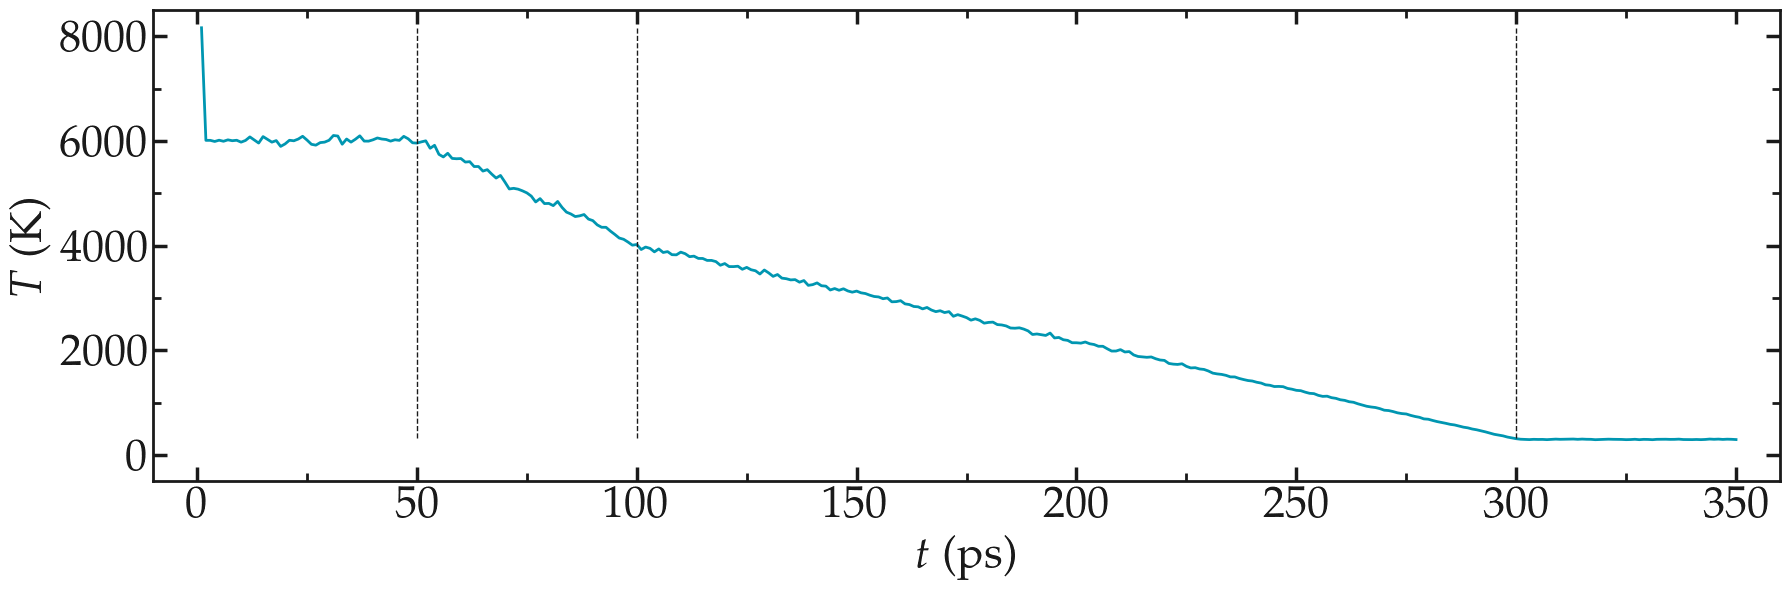

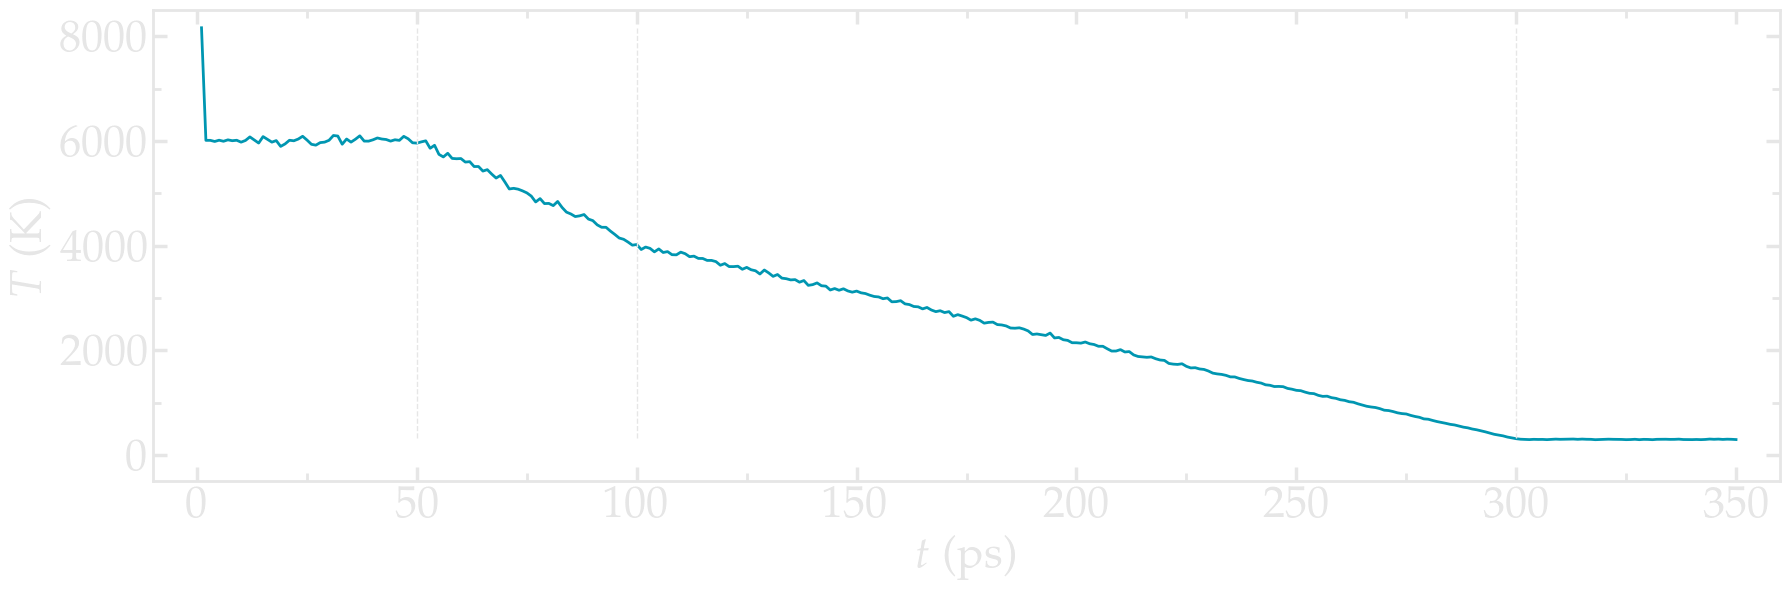

In [5]:
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):

    filename = "temperature_evolution"
    fig = plt.figure(figsize=(18,6))

    x_boundaries = -10, 360
    x_ticks = [0, 50, 100, 150, 200, 250, 300, 350]
    y_boundaries = -500, 8500
    y_ticks = [0, 2000, 4000, 6000, 8000]

    ax = []
    n = 0
    l_tot = 1
    c_tot = 1

    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))

    #divider = make_axes_locatable(ax[-1])
    ax[-1].plot(time, temperature, color=colors["myblue"], linewidth=2)
    ax[-1].plot(time/1000*0 + 50, temperature, '--', linewidth = 1, color=mygray)
    ax[-1].plot(time/1000*0 + 100, temperature, '--', linewidth = 1, color=mygray)
    ax[-1].plot(time/1000*0 + 300, temperature, '--', linewidth = 1, color=mygray)

    complete_panel(ax[-1], r'$t$ (ps)', r'$T$ (K)', legend=False, axis_color=mygray)

    plt.xlim(x_boundaries)
    plt.xticks(x_ticks)
    plt.ylim(y_boundaries)
    plt.yticks(y_ticks)    

    save_figure(fig, mode, git_root, path_figures, filename)